In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
orders = pd.read_csv("data/orders.csv")
order_products_prior = pd.read_csv("data/order_products__prior.csv")
order_products_train = pd.read_csv("data/order_products__train.csv")
products = pd.read_csv("data/products.csv")
aisles = pd.read_csv("data/aisles.csv")
departments = pd.read_csv("data/departments.csv")

In [3]:
print("Orders:", orders.shape)
print("Prior:", order_products_prior.shape)
print("Train:", order_products_train.shape)
print("Products:", products.shape)
print("Aisles:", aisles.shape)
print("Departments:", departments.shape)

orders.head()
products.head()

Orders: (3421083, 7)
Prior: (32434489, 4)
Train: (1384617, 4)
Products: (49688, 4)
Aisles: (134, 2)
Departments: (21, 2)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


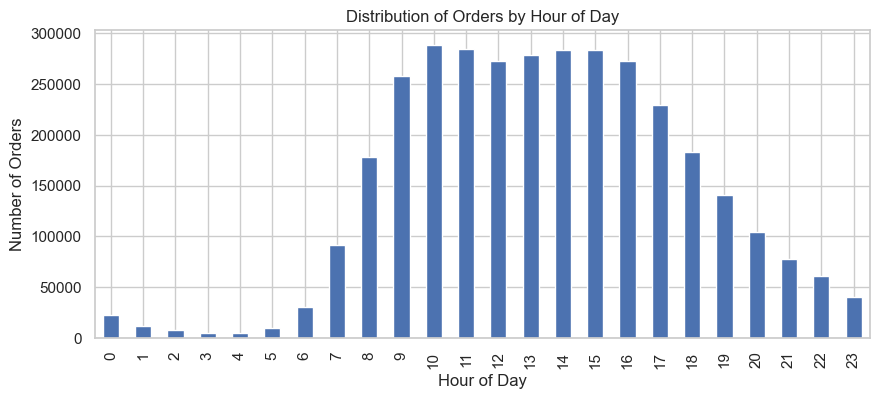

In [4]:
orders['order_hour_of_day'].value_counts().sort_index().plot(kind='bar', figsize=(10,4))
plt.title("Distribution of Orders by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
plt.show()

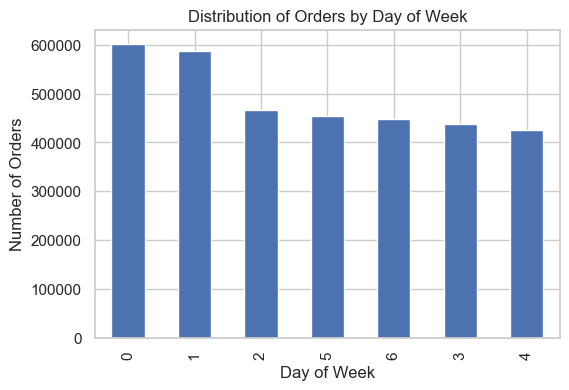

In [5]:
orders['order_dow'].value_counts().plot(kind='bar', figsize=(6,4))
plt.title("Distribution of Orders by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Orders")
plt.show()

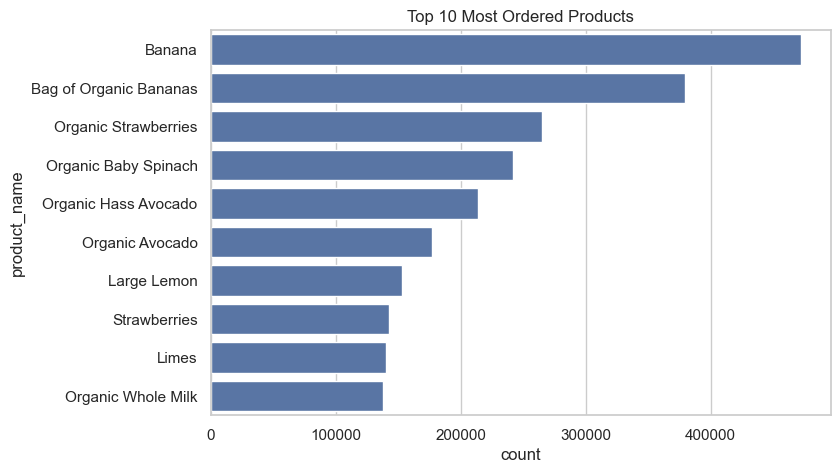

In [6]:
top_products = order_products_prior['product_id'].value_counts().head(10)
top_products = top_products.reset_index()
top_products.columns = ['product_id','count']
top_products = top_products.merge(products, on='product_id', how='left')

plt.figure(figsize=(8,5))
sns.barplot(data=top_products, x='count', y='product_name')
plt.title("Top 10 Most Ordered Products")
plt.show()

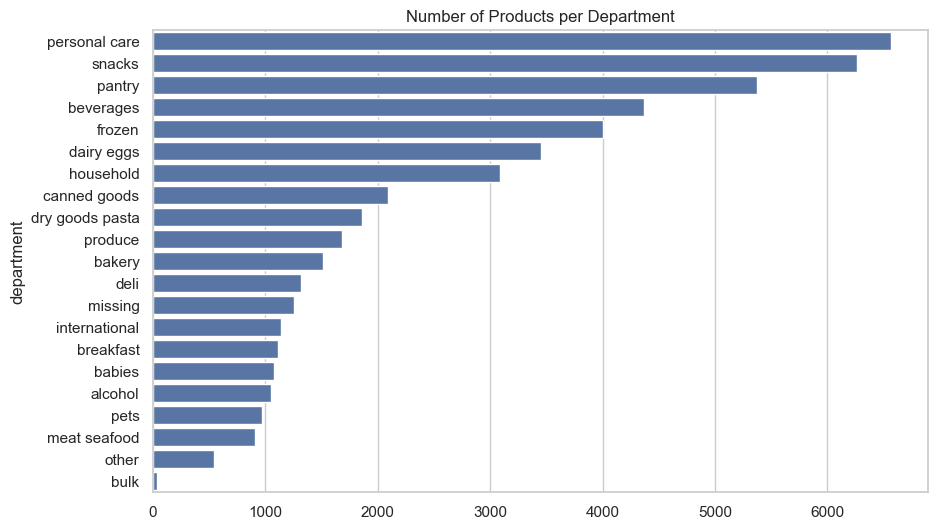

In [7]:
product_counts = products.merge(departments, on="department_id") \
                         .groupby("department")['product_id'].count().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=product_counts.values, y=product_counts.index)
plt.title("Number of Products per Department")
plt.show()